# Creación de la simulación con salida de 20% de la frontera derecha

Hacemos uso de los parámetros que existen en Config/parameters/vaciado_off20, y de la función que crea las condiciones iniciales utils.create_ics.create_ics_txt.

Se aumenta el número de partículas por unidad de área ya que se coloca una malla de 50x50 en el mismo espacio que en el caso anterior.

In [1]:
from utils.create_ics import create_ics_txt
from pathlib import Path

PROJECT_ROOT = Path("/media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH")

BOUNDARY_FILE = "vaciado_off20/vaciado_off20_boundary.json"
FLUID_FILE = "vaciado_off20/vaciado_off20_fluid.json"

OUTPUT_NAME = "vaciado20_est40x40_tree.txt"
OUTPUT_LOG = "vaciado20_est40x40_tree.log"

create_ics_txt(BOUNDARY_FILE, FLUID_FILE, OUTPUT_NAME, OUTPUT_LOG, PROJECT_ROOT)

[INFO] Ejecutando main.py con los siguientes parámetros:
  • Script principal:        /media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/InitialConditions/main.py
  • Archivo de frontera:     /media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/Config/parameters/vaciado_off20/vaciado_off20_boundary.json
  • Archivo de fluido:       /media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/Config/parameters/vaciado_off20/vaciado_off20_fluid.json
  • Carpeta de salida:       /media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/Output/init_cond
  • Nombre archivo salida:   vaciado20_est40x40_tree.txt
  • Nombre archivo resumen:  vaciado20_est40x40_tree.log

[✓] Ejecución completada correctamente.
Archivo generado: /media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/Output/init_cond/vaciado20_est40x40_tree.txt



0

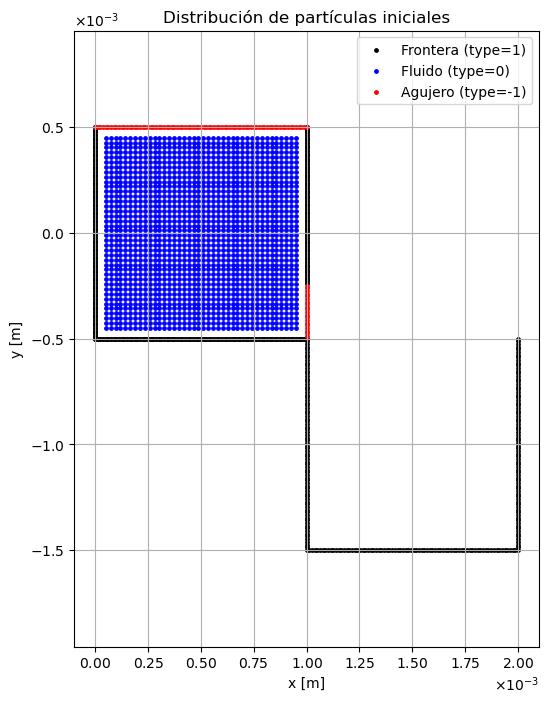

In [2]:
from utils.plot_ics import plot_ics

ics_vaciado_20 = f"{PROJECT_ROOT}/Output/init_cond/vaciado20_est40x40.txt"

plot_ics(ics_vaciado_20)

Hacemos inicialmente el proceso de estabilización para determinar hasta que punto es necesario dejar estabilizar la densidad para la malla de 50x50, dejamos hasta los 4000 pasos que se habían calculado para la malla de 40x40.

In [3]:
from utils.create_simJSON import create_simulation_config

create_simulation_config(
    experiment_name="vaciado20_est40x40_tree",
    input_file="Output/init_cond/vaciado20_est40x40.txt",
    base_json="AndresSimParams.json",
    B = 0.48,
    c = 0.001,
    steps = 4000,
    neighbor_method="quadtree",
    project_root=PROJECT_ROOT
)

✅ Archivo generado: Output/vaciado20_est40x40_tree/params.json


PosixPath('/media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/Output/vaciado20_est40x40_tree/params.json')

In [4]:
from utils.run_sim import run_single_simulation

run_single_simulation(
    experiment_dir=PROJECT_ROOT / "Output" / "vaciado20_est40x40_tree",
    sim_executable=PROJECT_ROOT / "simulacion",
    timeout_seconds=10000
)


🚀 Ejecutando simulación: vaciado20_est40x40_tree

[INFO] Leyendo parámetros desde: /media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/Output/vaciado20_est40x40_tree/params.json
[INFO] Configurada EoS Monaghan con parámetros:
       B=0.48, c=0.001, rho0=1000, gamma=7
Dentro de función de lectura de partículas
Separación dx/dy de frontera: 0, 0
Separación dx/dy de fluido: 0, 0
Primera partícula de frontera:
  ID: 0 pos: (0, 0.0005)
  tipo: Frontera
 h: 2.75e-05
Última partícula de fluido:
  ID: 2379 pos: (0.00095, 0.00045)
  tipo: Fluido
 h: 2.75e-05
Se leyeron 2380 partículas desde el archivo Output/init_cond/vaciado20_est40x40.txt

[particleSummary] Número total de partículas: 2380
Fluido: 1600, Ancho: 0.0009, Altura: 0.0009
Frontera: 780, Ancho: 0.002, Altura: 0.002
[INFO] Ejecutando test del kernel...
Prueba del kernel completada.
Resultados guardados en: Output/tests/kernel_test.output
[findNeighborsQuadTree] Buscando vecinos (Quadtree)...
Total partículas: 23

La simulación tuvo que hacerse de 40x40, 50x50 generaba una violación de segmento, en este caso duró 194.5 s que corresponde a aproximadamente 3.2 minutos.

In [14]:
from utils.create_gnuplot import generar_script_gnuplot

BASE_PLOT = f"{PROJECT_ROOT}/Output/vaciado20_est40x40_tree/Output/state_0000.txt"

generar_script_gnuplot(BASE_PLOT,
                       lim=3999,
                       retardo=0.001,
                       nombre_salida="vaciado_est40x40_tree.gp")


✅ Script Gnuplot generado correctamente: /media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/Output/vaciado20_est40x40_tree/vaciado_est40x40_tree.gp
📊 Rangos consecutivos detectados por tipo:
  Tipo 1: líneas 0–220 (221 partículas)
  Tipo -1: líneas 221–321 (101 partículas)
  Tipo 1: líneas 322–779 (458 partículas)
  Tipo 0: líneas 780–2379 (1600 partículas)


In [15]:
import subprocess

ruta_script = f"{PROJECT_ROOT}/Output/vaciado20_est40x40_tree/vaciado_est40x40_tree.gp"

result = subprocess.run(
    ["gnuplot", ruta_script],
    capture_output=True,
    text=True,
    check=True
)